## Imports

In [110]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Task 1

In [60]:
daily_tempratures = torch.randint(-10, 40, (30,), dtype=torch.float32)
daily_tempratures

tensor([ -7.,  17.,  -2.,  34.,  11.,  11.,   3.,  11.,   1.,   5.,   6.,   0.,
         10.,  32.,  23.,  -7.,  23.,  -7.,  29.,  -5.,   6., -10.,  23.,  19.,
         13.,  32.,  26.,  25.,  30.,   9.])

In [61]:
station_ids = ["Station A", "Station B", "Station C", "Station D", "Station E"]
stations = torch.tensor([i for i in range(len(station_ids))])
stations

tensor([0, 1, 2, 3, 4])

In [62]:
temprature_reading = torch.randint(-10, 40, (10,5), dtype=torch.float32) # Each row represent temprature of a day at each station
temprature_reading

tensor([[11., 30., -2., 27., 35.],
        [20., 34., 36., 21., 13.],
        [-1., 27., 38., 15., 24.],
        [20.,  9., 26., -7., 13.],
        [35., 11., 16., 17., 39.],
        [37., -3., 37., -5., 26.],
        [20., 26.,  9.,  9., 28.],
        [-6., -4.,  1., 36., 35.],
        [39., -6., 16.,  3., 16.],
        [33., -9.,  2.,  3.,  4.]])

In [63]:
mean_temp = torch.mean(temprature_reading, dim=0)
max_temp = torch.max(temprature_reading, dim=0)
min_temp = torch.min(temprature_reading, dim=0)

stats = {
    station: {
        "Mean Temperature": int(mean_temp[i]),
        "Max Temperature": int(max_temp.values[i]),
        "Min Temperature": int(min_temp.values[i])
    }
    for i, station in enumerate(station_ids)
}

### Printing in pretty format

In [151]:
print(f"{'Station':<12} {'Mean Temp(C)':<15} {'Max Temp(C)':<15} {'Min Temp(C)':<15}")
print("-" * 57)

for station, data in stats.items():
    print(f"{station:<12} {data['Mean Temperature']:<15} {data['Max Temperature']:<15} {data['Min Temperature']:<15}")

Station      Mean Temp(C)    Max Temp(C)     Min Temp(C)    
---------------------------------------------------------
Station A    20              39              -6             
Station B    11              34              -9             
Station C    17              38              -2             
Station D    11              36              -7             
Station E    23              39              4              


# Task 2

In [66]:
daily_temperatures_f = (daily_tempratures * 9 / 5) + 32
daily_temperatures_f

tensor([19.4000, 62.6000, 28.4000, 93.2000, 51.8000, 51.8000, 37.4000, 51.8000,
        33.8000, 41.0000, 42.8000, 32.0000, 50.0000, 89.6000, 73.4000, 19.4000,
        73.4000, 19.4000, 84.2000, 23.0000, 42.8000, 14.0000, 73.4000, 66.2000,
        55.4000, 89.6000, 78.8000, 77.0000, 86.0000, 48.2000])

In [67]:
daily_max = torch.max(daily_tempratures)
daily_max

tensor(34.)

In [69]:
daily_min = torch.min(daily_tempratures)
daily_min

tensor(-10.)

In [71]:
daily_range = daily_max - daily_min
daily_range

tensor(44.)

In [72]:
deviations = torch.std(temprature_reading, dim = 0)
deviations

tensor([15.7607, 16.6082, 15.5738, 13.8920, 11.4896])

In [79]:
print(f"The station with highest variation was {station_ids[torch.argmax(deviations)]} - {torch.max(deviations):.2f}")

The station with highest variation was Station B - 16.61


# Task 3

In [80]:
heat_warnings = temprature_reading > 30
heat_warnings

tensor([[False, False, False, False,  True],
        [False,  True,  True, False, False],
        [False, False,  True, False, False],
        [False, False, False, False, False],
        [ True, False, False, False,  True],
        [ True, False,  True, False, False],
        [False, False, False, False, False],
        [False, False, False,  True,  True],
        [ True, False, False, False, False],
        [ True, False, False, False, False]])

In [92]:
print("Days and stations with heat warnings: ")
print("-" * 30)

for i in range(temprature_reading.shape[0]):
    for j in range(temprature_reading.shape[1]):
        if heat_warnings[i][j]:
            print(f"\nStation: {station_ids[j]}\nDay: {i+1}\nTemperature: {int(temprature_reading[i][j])}")

Days and stations with heat warnings: 
------------------------------

Station: Station E
Day: 1
Temperature: 35

Station: Station B
Day: 2
Temperature: 34

Station: Station C
Day: 2
Temperature: 36

Station: Station C
Day: 3
Temperature: 38

Station: Station A
Day: 5
Temperature: 35

Station: Station E
Day: 5
Temperature: 39

Station: Station A
Day: 6
Temperature: 37

Station: Station C
Day: 6
Temperature: 37

Station: Station D
Day: 8
Temperature: 36

Station: Station E
Day: 8
Temperature: 35

Station: Station A
Day: 9
Temperature: 39

Station: Station A
Day: 10
Temperature: 33


In [95]:
humidity = torch.randint(10, 101, (30, 5), dtype=torch.float) / 100  # 10-100%
humidity

tensor([[0.6300, 0.9000, 0.9500, 0.4900, 0.8600],
        [0.5900, 0.3900, 0.1300, 0.1500, 0.6400],
        [0.3800, 0.5500, 0.6700, 0.5500, 0.5400],
        [0.7800, 0.4800, 0.1200, 0.7100, 0.6400],
        [0.7700, 0.3900, 0.8000, 0.9900, 0.8000],
        [0.8300, 0.4900, 0.3100, 0.1900, 0.8400],
        [0.6100, 1.0000, 0.6600, 0.1200, 0.6100],
        [0.1700, 0.7100, 0.9200, 0.4900, 0.6300],
        [0.4000, 0.3400, 0.5800, 0.8700, 0.5200],
        [0.6500, 0.2200, 0.6800, 0.9100, 0.8600],
        [0.6300, 0.8400, 0.9500, 0.2100, 0.9400],
        [0.1500, 0.2600, 0.6200, 0.4000, 0.9900],
        [0.8000, 0.4900, 0.6800, 0.6500, 0.7300],
        [0.6800, 0.8200, 0.2300, 0.4700, 0.9700],
        [0.9100, 0.1700, 0.5700, 0.6300, 0.9200],
        [0.9000, 0.7100, 0.4700, 0.6800, 0.2900],
        [0.9200, 0.3500, 0.5500, 0.8100, 0.1400],
        [0.1700, 0.7000, 0.6500, 0.6000, 0.5000],
        [0.4100, 0.4700, 0.9400, 0.6900, 0.3000],
        [0.3700, 0.2800, 0.7300, 0.8100, 0.5500],


In [94]:
rainfall = torch.randint(0, 6, (30, 5), dtype=torch.float32) # 0-5cm
rainfall

tensor([[4., 0., 2., 2., 1.],
        [2., 3., 2., 5., 3.],
        [0., 2., 4., 5., 3.],
        [4., 4., 4., 1., 2.],
        [0., 4., 3., 1., 4.],
        [3., 3., 3., 2., 4.],
        [2., 1., 1., 0., 5.],
        [4., 1., 5., 4., 1.],
        [5., 5., 4., 3., 5.],
        [2., 2., 0., 4., 2.],
        [5., 1., 3., 1., 1.],
        [4., 5., 5., 5., 1.],
        [2., 2., 5., 4., 1.],
        [4., 1., 0., 3., 4.],
        [2., 2., 2., 5., 4.],
        [1., 2., 1., 0., 1.],
        [0., 0., 2., 4., 1.],
        [3., 3., 3., 2., 1.],
        [1., 2., 2., 3., 0.],
        [2., 5., 4., 3., 2.],
        [4., 2., 3., 0., 3.],
        [0., 3., 4., 0., 4.],
        [5., 0., 1., 4., 3.],
        [3., 5., 1., 1., 5.],
        [3., 2., 2., 2., 1.],
        [2., 3., 1., 2., 3.],
        [3., 0., 3., 2., 3.],
        [1., 0., 2., 5., 3.],
        [2., 5., 0., 2., 3.],
        [5., 0., 4., 5., 1.]])

In [96]:
calibration_factors = torch.tensor([1.05, 0.98, 1.02, 0.97, 1.03])

In [97]:
adjusted_rainfall = rainfall * calibration_factors
adjusted_rainfall

tensor([[4.2000, 0.0000, 2.0400, 1.9400, 1.0300],
        [2.1000, 2.9400, 2.0400, 4.8500, 3.0900],
        [0.0000, 1.9600, 4.0800, 4.8500, 3.0900],
        [4.2000, 3.9200, 4.0800, 0.9700, 2.0600],
        [0.0000, 3.9200, 3.0600, 0.9700, 4.1200],
        [3.1500, 2.9400, 3.0600, 1.9400, 4.1200],
        [2.1000, 0.9800, 1.0200, 0.0000, 5.1500],
        [4.2000, 0.9800, 5.1000, 3.8800, 1.0300],
        [5.2500, 4.9000, 4.0800, 2.9100, 5.1500],
        [2.1000, 1.9600, 0.0000, 3.8800, 2.0600],
        [5.2500, 0.9800, 3.0600, 0.9700, 1.0300],
        [4.2000, 4.9000, 5.1000, 4.8500, 1.0300],
        [2.1000, 1.9600, 5.1000, 3.8800, 1.0300],
        [4.2000, 0.9800, 0.0000, 2.9100, 4.1200],
        [2.1000, 1.9600, 2.0400, 4.8500, 4.1200],
        [1.0500, 1.9600, 1.0200, 0.0000, 1.0300],
        [0.0000, 0.0000, 2.0400, 3.8800, 1.0300],
        [3.1500, 2.9400, 3.0600, 1.9400, 1.0300],
        [1.0500, 1.9600, 2.0400, 2.9100, 0.0000],
        [2.1000, 4.9000, 4.0800, 2.9100, 2.0600],


# Task 4

In [100]:
wqi_temp = temprature_reading[:10]
wqi_humidity = humidity[:10]
wqi_rainfall = rainfall[:10]

In [101]:
wqi = 0.5*wqi_temp + 0.3*wqi_humidity - 0.2*wqi_rainfall
wqi

tensor([[ 4.8890, 15.2700, -1.1150, 13.2470, 17.5580],
        [ 9.7770, 16.5170, 17.6390,  9.5450,  6.0920],
        [-0.3860, 13.2650, 18.4010,  6.6650, 11.5620],
        [ 9.4340,  3.8440, 12.2360, -3.4870,  6.2920],
        [17.7310,  4.8170,  7.6400,  8.5970, 18.9400],
        [18.1490, -1.9530, 17.9930, -2.8430, 12.4520],
        [ 9.7830, 13.1000,  4.4980,  4.5360, 13.1830],
        [-3.7490, -1.9870, -0.2240, 17.3470, 17.4890],
        [18.6200, -3.8980,  7.3740,  1.1610,  7.1560],
        [16.2950, -4.8340,  1.2040,  0.9730,  1.8580]])

In [102]:
elevation = torch.tensor([10, 250, 750, 1500, 50])  # meters above sea level

#### Relation between elevation and temprature

Average temperature by station: tensor([20.8000, 11.5000, 17.9000, 11.9000, 23.3000])
Station elevations: tensor([  10,  250,  750, 1500,   50])


tensor([[ 1.0000, -0.6214],
        [-0.6214,  1.0000]])

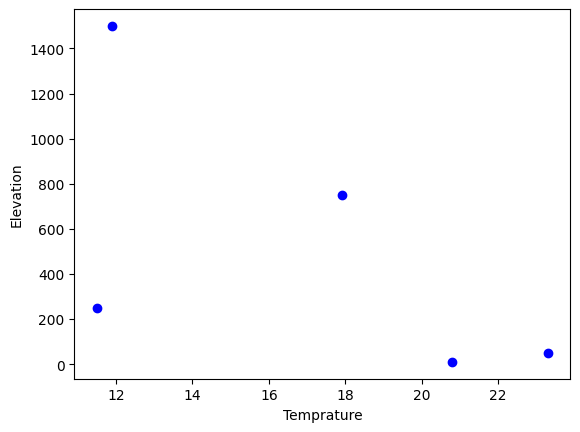

In [124]:
print(f"Average temperature by station: {torch.mean(temprature_reading, dim=0)}")
print(f"Station elevations: {elevation}")
plt.xlabel("Temprature")
plt.ylabel("Elevation")
plt.scatter(torch.mean(temprature_reading, dim=0), elevation, color='blue', marker='o', label='Data Points')

corr = torch.corrcoef(torch.stack([torch.mean(temprature_reading, dim=0), elevation]))
corr

In [127]:
ideal = torch.argmax(wqi.mean(dim=0))
print(f"The ideal station by highest WQI: {station_ids[ideal]}")

The ideal station by highest WQI: Station E


### Heatmap for WQI

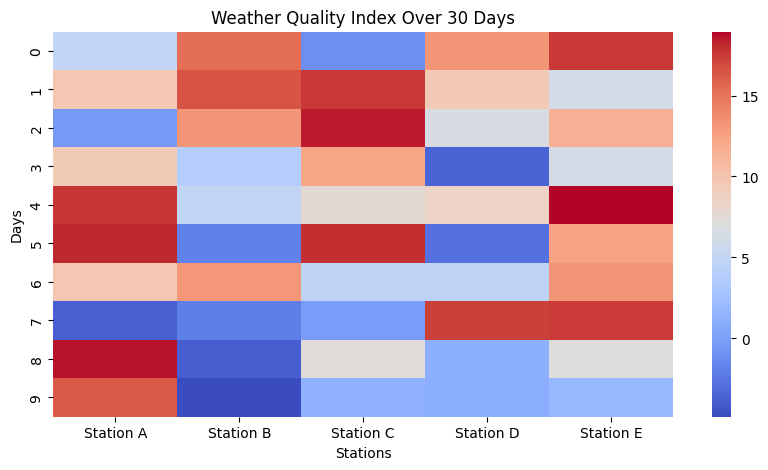

In [135]:
plt.figure(figsize=(10, 5))
sns.heatmap(wqi.numpy(), cmap='coolwarm', annot=False, xticklabels=station_ids)
plt.title("Weather Quality Index Over 30 Days")
plt.xlabel("Stations")
plt.ylabel("Days")
plt.show()


### Temperature trends for each station

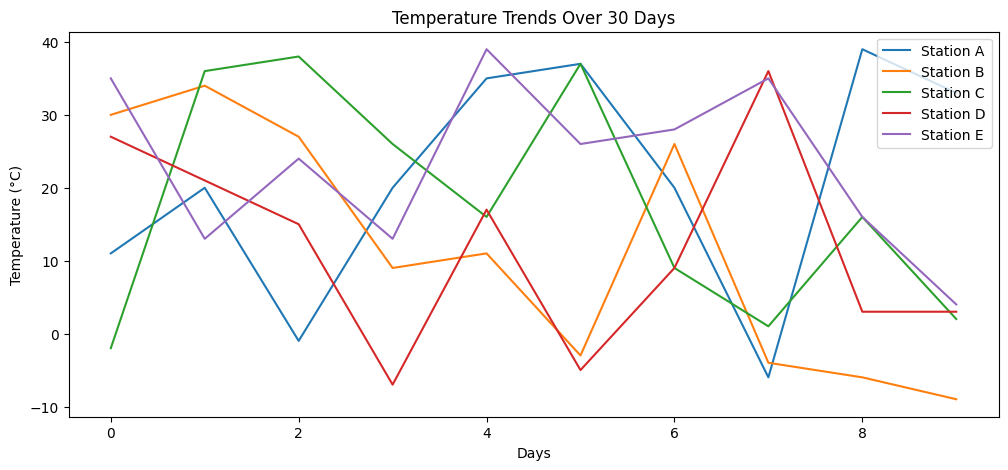

In [143]:
plt.figure(figsize=(12, 5))
for i in range(5):
    plt.plot(temprature_reading[:, i].numpy(), label=station_ids[i])
plt.xlabel("Days")
plt.ylabel("Temperature (°C)")
plt.title("Temperature Trends Over 30 Days")
plt.legend()
plt.show()

### Scatter plot for Humidity vs. WQI

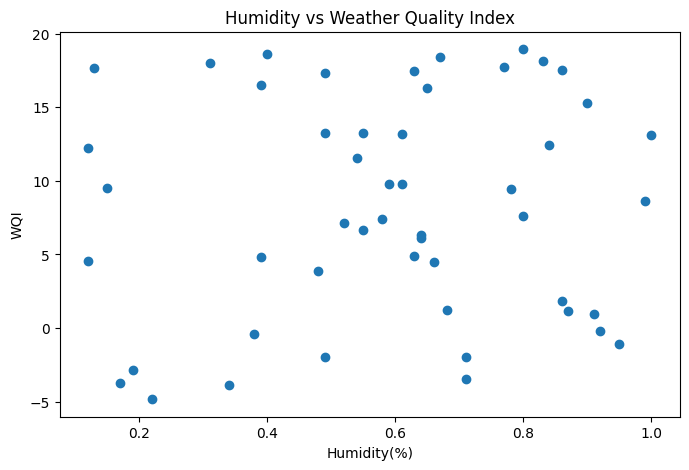

In [142]:
plt.figure(figsize=(8, 5))
plt.scatter(humidity[:10], wqi)
plt.xlabel("Humidity(%)")
plt.ylabel("WQI")
plt.title("Humidity vs Weather Quality Index")
plt.show()

### Variation in daily temprature

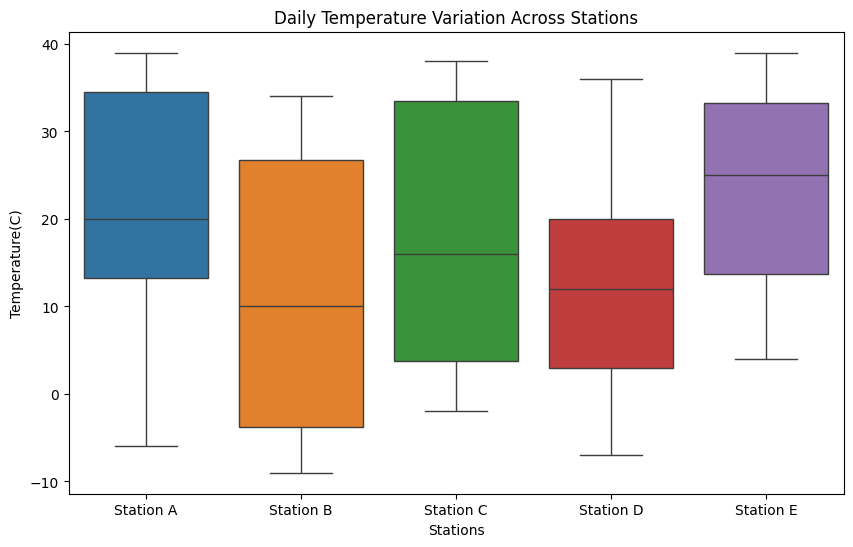

In [150]:
plt.figure(figsize=(10, 6))
ax = sns.boxplot(data=temprature_reading)
ax.set_xticks(range(len(station_ids)))
ax.set_xticklabels(station_ids)

plt.xlabel("Stations")
plt.ylabel("Temperature(C)")
plt.title("Daily Temperature Variation Across Stations")
plt.show()